In [17]:
import torch
import torch.nn as nn
from torchinfo import summary
from torchvision import transforms as T
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.nn import functional as F
from torch import optim
import tensorflow as tf

import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow

from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_curve,auc,accuracy_score
from sklearn.preprocessing import label_binarize

#create a model class that inherits nn.Module


In [12]:
class Config:
    TRAIN_DIR =  '/Users/anshmadan/Coding/IML Final Project/Birds_25/train'
    VAL_DIR = '/Users/anshmadan/Coding/IML Final Project/Birds_25/valid'
    CLASS_NAME = sorted(os.listdir(TRAIN_DIR))
    N_CLASS = len(CLASS_NAME)
    IMG_SIZE = 224
    BATCH_SIZE = 128
    LR = 0.001
    EPOCHS = 30

In [11]:
# Device selection
if torch.backends.mps.is_available():
    device = torch.device('mps')
    print("Using MPS (GPU) device")
elif torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"Using CUDA device with {torch.cuda.device_count()} GPU(s)!")
else:
    device = torch.device('cpu')
    print("Using CPU device")

# Load model to the appropriate device
def Load_Model_to_GPU(model):
    # For CUDA devices with multiple GPUs
    if device.type == 'cuda' and torch.cuda.device_count() > 1:
        print(f'Using {torch.cuda.device_count()} GPUs!')
        model = nn.DataParallel(model)  # Wrap model for multi-GPU training
    # For MPS or single GPU (CUDA) or CPU
    model = model.to(device)
    return model

# Example usage
model = nn.Linear(10, 5)  # Example model
model = Load_Model_to_GPU(model)
print(f"Model is on device: {next(model.parameters()).device}")


Using MPS (GPU) device
Model is on device: mps:0


In [14]:
TRAIN_DIR =  '/Users/anshmadan/Coding/IML Final Project/Birds_25/train'
VAL_DIR = '/Users/anshmadan/Coding/IML Final Project/Birds_25/valid'

class_names = [
    f for f in os.listdir(TRAIN_DIR)
    if not f.startswith('.') and f != '.DS_Store'
]

print(class_names)

['Coppersmith-Barbet', 'Cattle-Egret', 'White-Breasted-Waterhen', 'Asian-Green-Bee-Eater', 'Common-Myna', 'Hoopoe', 'Gray-Wagtail', 'Jungle-Babbler', 'White-Wagtail', 'Common-Tailorbird', 'Common-Rosefinch', 'Rufous-Treepie', 'Ruddy-Shelduck', 'Sarus-Crane', 'Red-Wattled-Lapwing', 'Common-Kingfisher', 'House-Crow', 'White-Breasted-Kingfisher', 'Forest-Wagtail', 'Northern-Lapwing', 'Indian-Peacock', 'Indian-Pitta', 'Indian-Grey-Hornbill', 'Brown-Headed-Barbet', 'Indian-Roller']


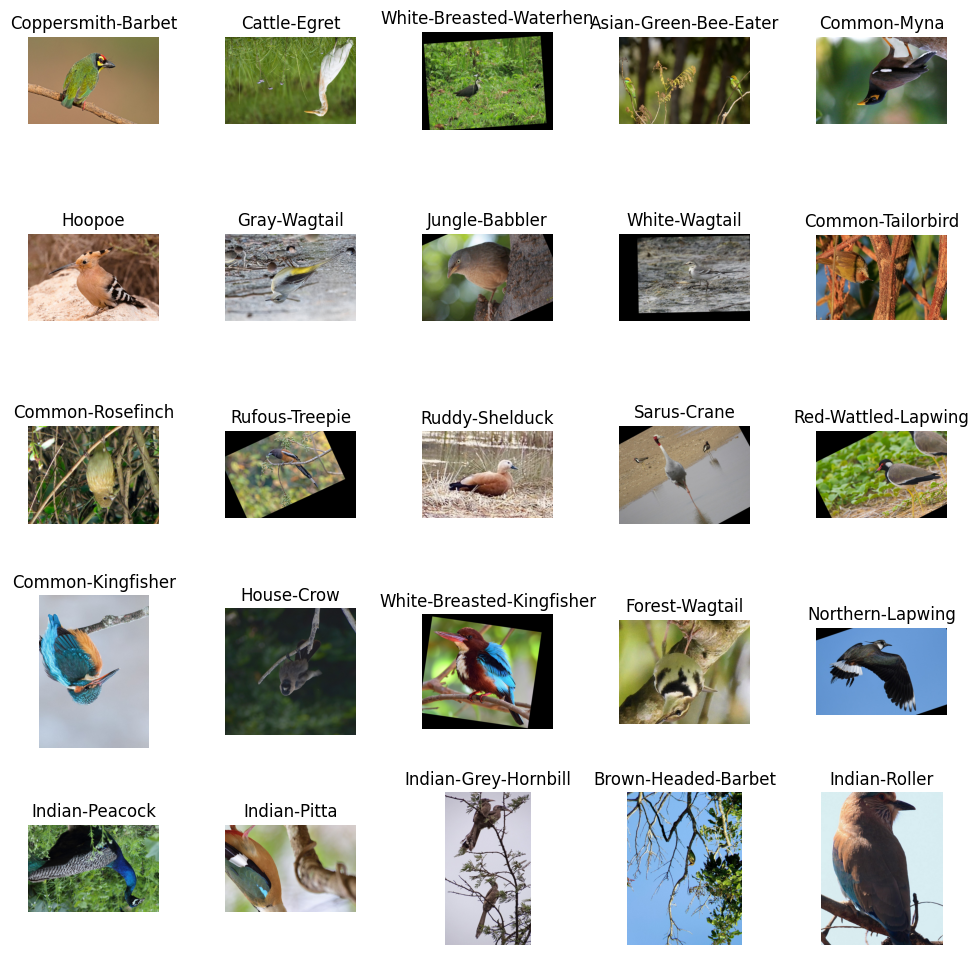

In [16]:
# Create a figure with subplots for each class
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
fig.tight_layout()

# Load and display a random image from each class
for i, cls in enumerate(class_names):
    ax = axs[i // 5][i % 5]
    img_path = os.path.join(TRAIN_DIR, cls, os.listdir(os.path.join(TRAIN_DIR, cls))[np.random.randint(0, len(os.listdir(os.path.join(TRAIN_DIR, cls))))])
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(cls)
    
plt.show()

In [19]:
transform = T.Compose([
    T.Resize((Config.IMG_SIZE,Config.IMG_SIZE)),
    T.RandomAutocontrast(0.2),
    T.CenterCrop((Config.IMG_SIZE,Config.IMG_SIZE)),
    T.ToTensor()
])